# Parte C: Visualización

## **1.** Carga de resultados de la parte anterior.

📝 Carga del archivo `df_preprocesado.csv` que generamos en la Parte B: Preprocesado de datos. 

In [12]:
import pandas as pd
path = '/Users/Usuario PC/OneDrive/Documentos/Esp. Bioinformática/TIAD/df_preprocesado'

# Leemos el archivo df_preprocesado.csv y lo guardamos en un DataFrame
df = pd.read_csv('df_preprocesado.csv', sep=',', comment='#')

C:\Users\Usuario PC\AppData\Local\Temp\ipykernel_19608\1382969468.py:5: DtypeWarning: Columns (20,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_preprocesado.csv', sep=',', comment='#')


In [13]:
print(df.head())

print(f"-----------------------------------")
print(f"El DataFrame tiene {len(df)} filas y {len(df.columns)} columnas.")

   PATIENT_ID  SEX   AGE  METASTASIS  OS_STATUS  OS_MONTHS  SAMPLE_ID  \
0           1    1  66.0           1          1       7.89          1   
1           2    1  36.0           0          1      17.97          2   
2           3    1  54.0           0          1      31.77          3   
3           4    1  40.0           0          1      24.77          4   
4           5    1  50.0           0          1      17.18          5   

  PR_STATUS HER2_STATUS  TUMOR_STAGE  ... PAM50_SUBTYPE_Basal-like  \
0  Negative    Negative          3.0  ...                     True   
1  Negative    Negative          2.0  ...                     True   
2  Negative    Negative          2.0  ...                     True   
3  Negative    Negative          2.0  ...                     True   
4  Negative    Negative          1.0  ...                     True   

  PAM50_SUBTYPE_HER2-enriched PAM50_SUBTYPE_Luminal A PAM50_SUBTYPE_Luminal B  \
0                       False                   False      

## **2.** Visualización.

Para lograr una mayor comprensión de los datos se visualizarán sus parámetros de distintas formas.

### Gráfico de burbujas

A partir de la librería `seaborn` se visualizarán los datos de edades vs el tiempo de supervivencia de un paciente.

<Axes: xlabel='AGE', ylabel='OS_MONTHS'>

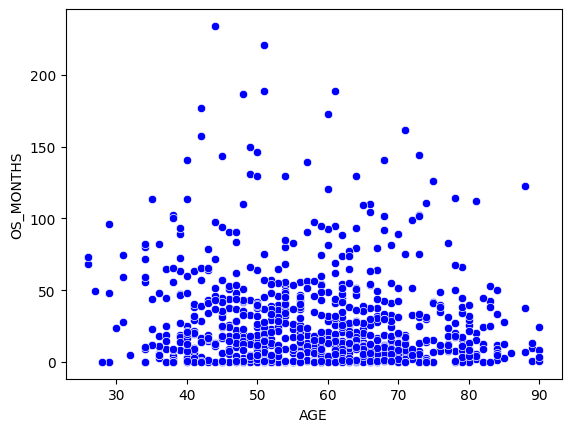

In [14]:
import seaborn as sns

# Crear el gráfico de burbujas con Seaborn
sns.scatterplot(x='AGE',        
                y='OS_MONTHS',  
                data=df,        
                color='blue'    
                )

Podemos ver que hay cierto comportamiento en forma de campana, donde las personas con edades muy jóvenes o muy grandes tienden  a tener un menor tiempo de supervivencia. No obstante, no es del todo honesta la representación ya que no podemos ver si el tiempo de supervivencia se dejo de medir por que el paciente falleció o por que dejo de ir a controles.

📝 Por lo tanto, se actualiza el gráfico para que contemple información respecto al estado del paciente (*OS_STATUS*). Coloreando cada punto acorde si el mismo corresponde a un paciente fallecido o a uno vivo.

<Axes: xlabel='AGE', ylabel='OS_MONTHS'>

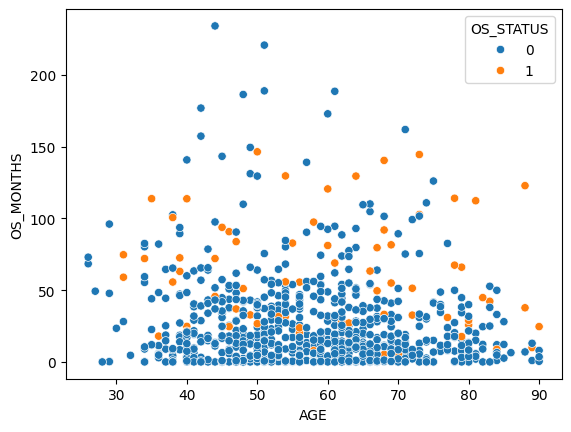

In [15]:
import seaborn as sns

# Crear el gráfico de burbujas con Seaborn pero con la función 'hue' para colorear los puntos segun el parametro
# 'OS_STATUS')
sns.scatterplot(x='AGE',            
                y='OS_MONTHS',      
                data=df,            
                hue='OS_STATUS'
                ) 

Con esto se realizó en una sola figura un gráfico que tambien refleja los valores dede *OS_STATUS* en los colores de cada punto

### Filtrado.

En el siguiente ejemplo filtramos y armamos un gráfico de únicamente aquellos pacientes `TUMOR_STAGE=3` y que tienen `AGE<30` .

In [16]:
# Construcción de máscara booleana respecto a las filas que cumplen la condición
mask = (df['OS_MONTHS'] > 10) & (df['METASTASIS'] == 0) 

# Generación de un nuevo df con aquellos ejemplos que cumplan con la máscara booleana
new_df = df[mask] 

<Axes: xlabel='AGE', ylabel='OS_MONTHS'>

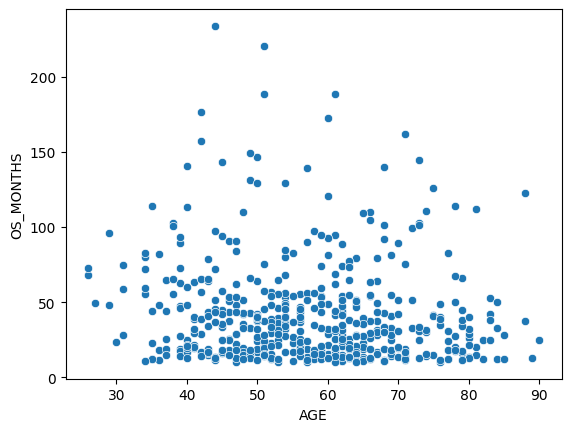

In [17]:
# GRAFICO
sns.scatterplot(x='AGE', y='OS_MONTHS', data=new_df) 

### Diagrama de barras

A continuación vemos un diagrama de barras que contabiliza la cantidad de pacientes masculinos vs pacientes femeninos en el DataFrame.

<Axes: xlabel='SEX', ylabel='count'>

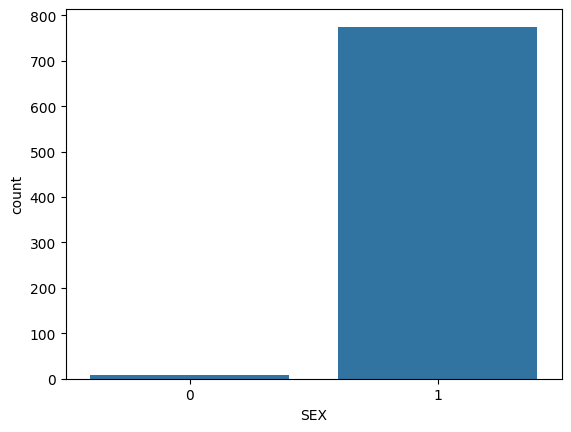

In [18]:
import seaborn as sns

# Diagrama de barras para el atributo SEX
sns.countplot(x='SEX', data=df)

En este Dataframe hay muchisimos mas datos de pacientes femeninos que de pacientes masculinos, este fenómeno de tener muchos más datos de una categoría que de otra es conocido como *Desbalance de clases*. Usualmente es algo que se prefiere evitar ya que puede traer problemas con ciertas técnicas de aprendizaje automático. No obstante, a veces uno se ve limitado por el dominio, como es este caso en el que estamos trabajando con datos de pacientes de cáncer de mama.

📝 **c)** A continuación se realiza un diagrama de barras del atributo `PR_STATUS`.

<Axes: xlabel='PR_STATUS', ylabel='count'>

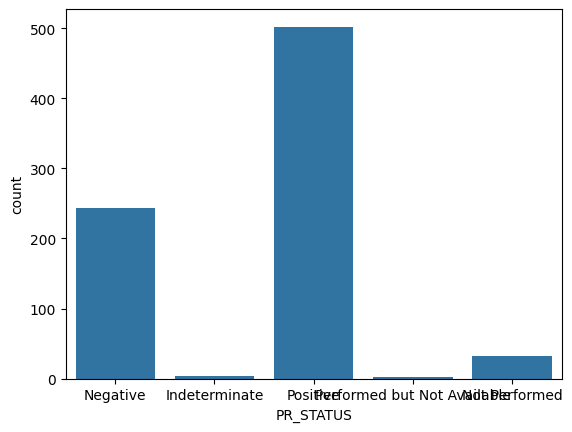

In [19]:
import seaborn as sns

# Diagrama de barras para el atributo PR_STATUS
sns.countplot(x='PR_STATUS', data=df) 

### Histograma

A continuación se muestra un ejemplo de un histograma aplicado sobre el atributo numérico *AGE*.

<Axes: xlabel='AGE', ylabel='Count'>

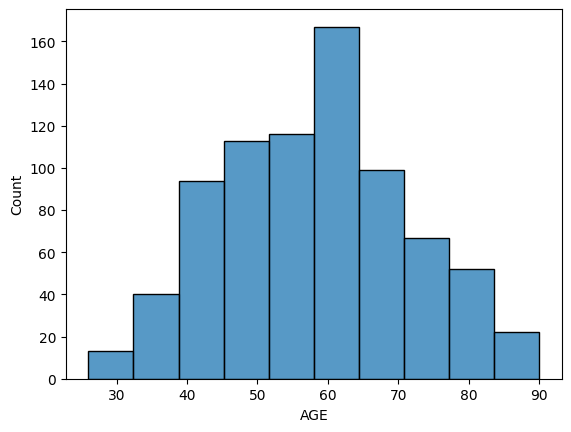

In [30]:
import seaborn as sns

# Histograma para el atributo AGE
sns.histplot(df['AGE'], bins=10, kde=False)

En este caso discretizamos *AGE* en 10 intervalos. Esto resultó útil ya que nos permitió identificar que la mayoría de pacientes del DataFrame tienen edades entre 40 y 70 años. E

📝 A continuación se realiza un histograma del atributo `OS_MONTHS`. 

<Axes: xlabel='OS_MONTHS', ylabel='Count'>

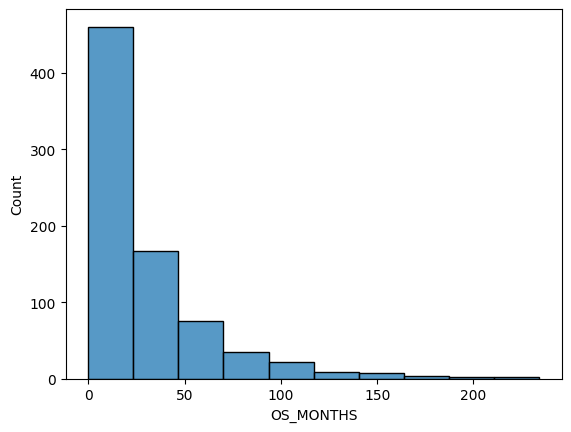

In [ ]:
import seaborn as sns

# histograma para el atributo AGE
sns.histplot(df['OS_MONTHS'], bins=10, kde=False) 

### Diagrama de caja

A continuación se realizó un diagrama de caja para el atributo *OS_MONTHS*.

<Axes: xlabel='OS_MONTHS'>

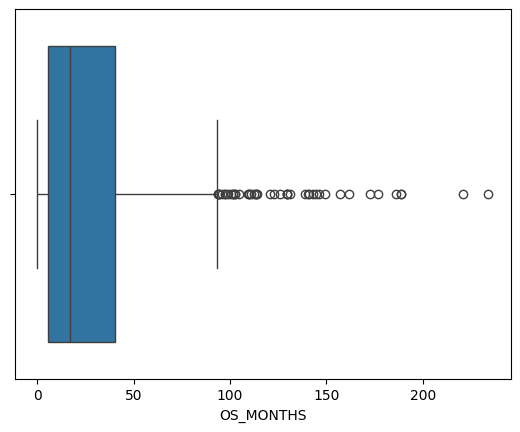

In [31]:
import seaborn as sns

sns.boxplot(x=df['OS_MONTHS'])

En el gráfico anterior 3s interesante notar cómo el 75% inferior de los datos se agrupa por debajo de los 50 meses donde apenas un 25% o menos de los datos logró realizar seguimiento por más de esta cantidad de meses.

Respecto a los valores irregulares, parece haber varios en el dataset, hay casos especiales que realizaron seguimiento durante mas de 200 meses.

📝 A continuación se realiza un diagrama de caja del atributo `AGE`.

<Axes: xlabel='AGE'>

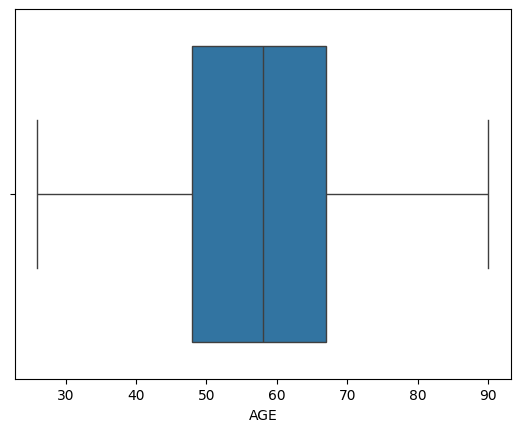

In [23]:
import seaborn as sns

sns.boxplot(x=df['AGE'])  

Se puede observar algo similar a lo que se observó en el gráfico de barras, que la mayoría de los pacientes se encuentran en el rango etario de 40 a 70 años aproximadamente. 